## Perform clustering for the auto insurance data to obtain optimum number of clusters.

In [1]:
#Import required packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [4]:
df_ins = pd.read_csv(r'D:\360digi\DS\Sharath\KMeans_Clustering\handson\Dataset_Assignment Clustering_K Means\AutoInsurance.csv')
df_ins.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
df_ins.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Handling duplicate

In [7]:
#Handling duplicates
duplicate = df_ins.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool


0

In [8]:
sum(duplicate)

0

In [9]:
duplicate.unique()  #No duplicate records exists.

array([False])

### Missing value analysis

In [10]:
#Check for missing values
df_ins.isnull().sum() #No missing values

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

### Dividing Categorical and Numerical variables from dataset¶

In [11]:
df_ins_num = df_ins.iloc[:, [2,9,12,13,14,15,16,21]].copy()
df_ins_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [12]:
#extracting column indexes of categorical data

all_col_list = list(np.arange(len(df_ins.columns)));
col_list = [2,9,12,13,14,15,16,21];
rem_col = np.setdiff1d(all_col_list,col_list);print(rem_col)

[ 0  1  3  4  5  6  7  8 10 11 17 18 19 20 22 23]


In [13]:
df_ins_cate = df_ins.iloc[:,rem_col].copy()
df_ins_cate.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### Outlier Analysis

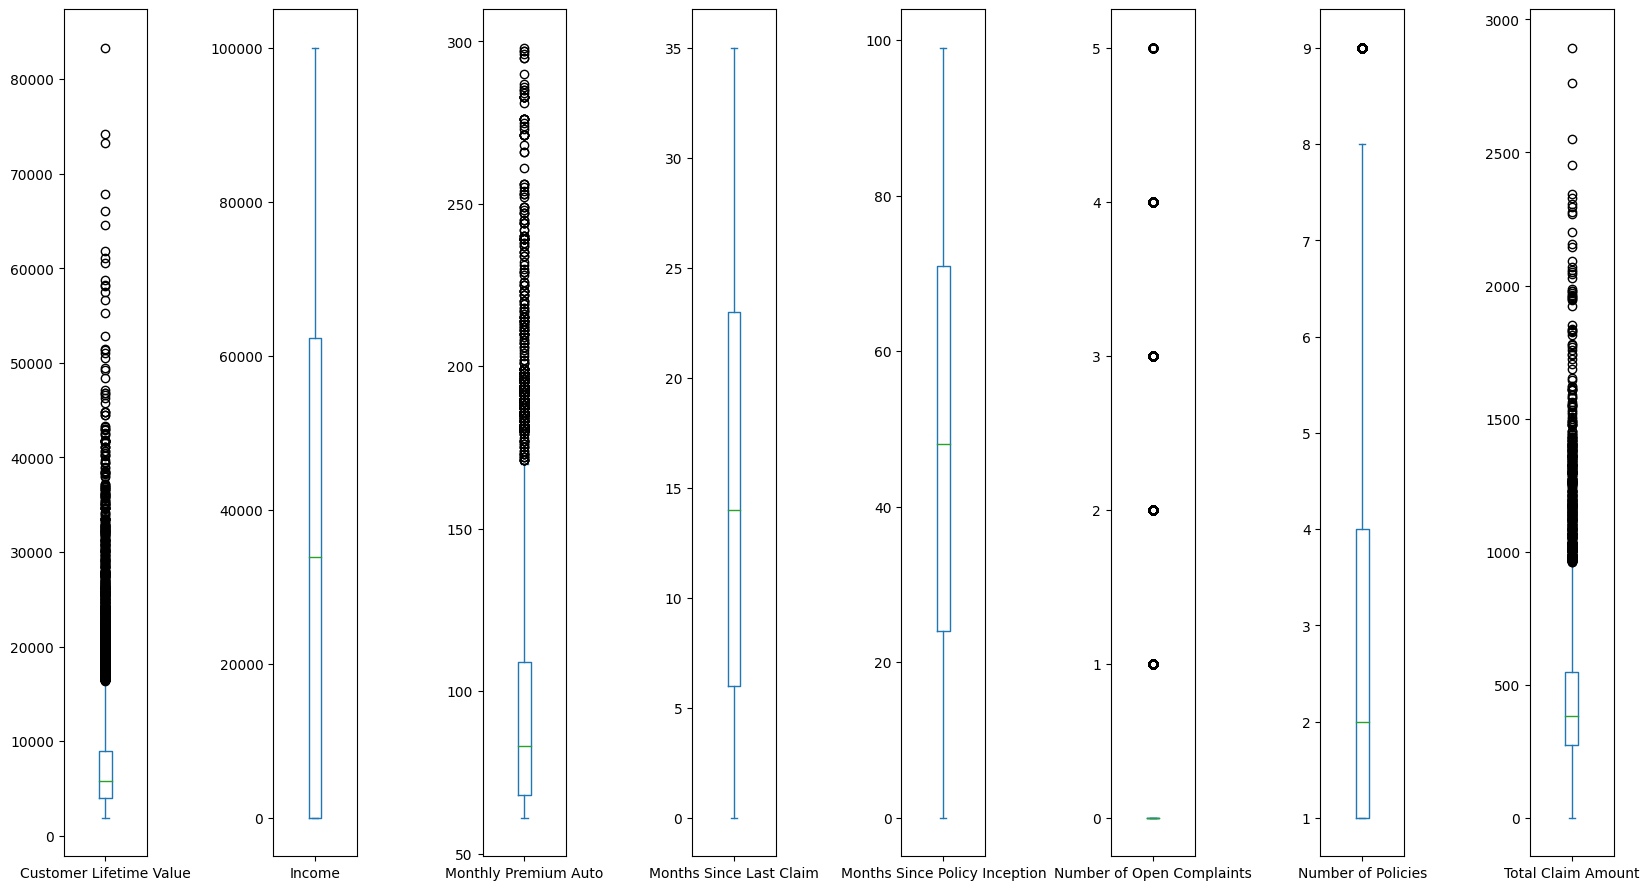

In [14]:
#Box plot visualization to view the outliers.

df_ins_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()


#Customer Lifetime Value, Monthly Premium Auto, Number of Open Complaints, Number of Policies, Total Claim Amount columns have outliers


### Winsorization

In [15]:
# Winsorization for "Customer Lifetime Value" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Customer Lifetime Value'])

df_ins_num['Customer Lifetime Value'] = winsor.fit_transform(df_ins_num[['Customer Lifetime Value']])

In [16]:
# Winsorization for "Monthly Premium Auto" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Monthly Premium Auto'])

df_ins_num['Monthly Premium Auto'] = winsor.fit_transform(df_ins_num[['Monthly Premium Auto']])

In [17]:
# Winsorization for "Number of Policies" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Number of Policies'])

df_ins_num['Number of Policies'] = winsor.fit_transform(df_ins_num[['Number of Policies']])


In [18]:
# Winsorization for "Total Claim Amount" column
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = ['Total Claim Amount'])

df_ins_num['Total Claim Amount'] = winsor.fit_transform(df_ins_num[['Total Claim Amount']])


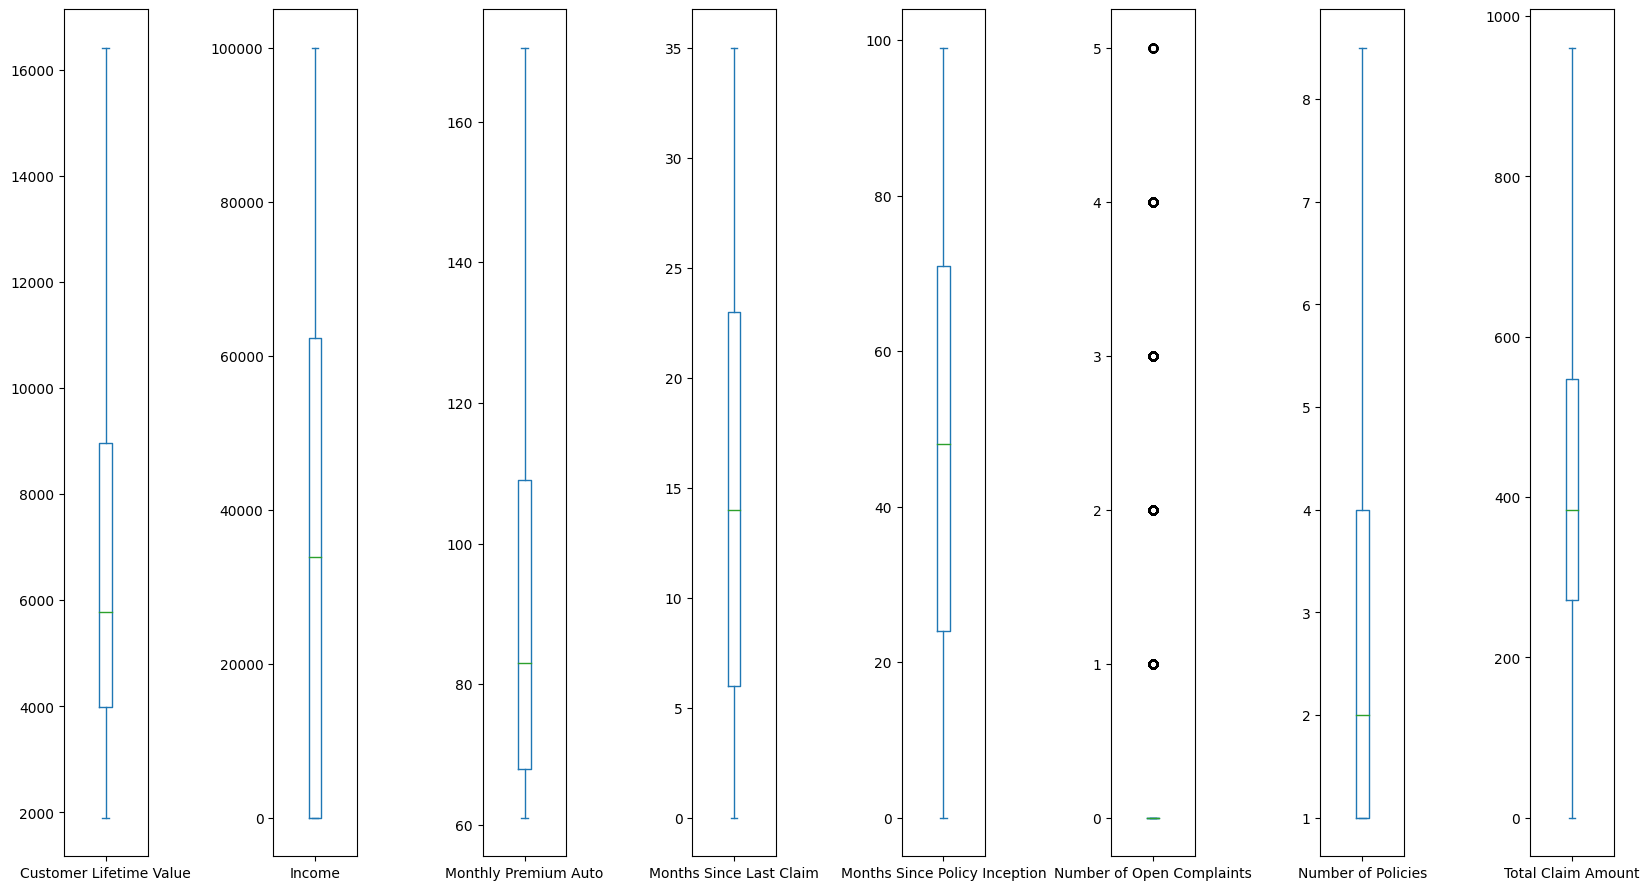

In [19]:
#Box plot visualization to view after the removal of outliers.

df_ins_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 11))

plt.subplots_adjust(wspace = 1.5)
plt.show()

In [ ]:
# Winsorization technique cannot be applied to columns 'Number of Open Complaints' because the variation in data is low.

In [20]:
# Zero and near zero variance
df_ins_num.var()

Customer Lifetime Value          1.792766e+07
Income                           9.229386e+08
Monthly Premium Auto             8.074843e+02
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.449002e+00
Total Claim Amount               5.772211e+04
dtype: float64

### Dummy variable creation for categorical data

In [21]:
df_ins_cate.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [22]:
df_ins_cate.shape

(9134, 16)

In [23]:
# Applying One-Hot Encoding with get_dummies
df_ins_cate = pd.get_dummies(df_ins_cate,columns = ['State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'], drop_first = True)

In [24]:
df_ins_cate.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,BU79786,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,QZ44356,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,AI49188,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,WW63253,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,HB64268,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [25]:
#Concatenate the entire data
df_new = pd.concat([df_ins_cate, df_ins_num], axis = 1)
df_new.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,BU79786,0,0,0,1,0,0,0,0,0,...,1,0,2763.519279,56274,69.0,32,5,0,1.0,384.811147
1,QZ44356,0,0,0,0,0,1,0,0,0,...,1,0,6979.535903,0,94.0,13,42,0,8.0,960.399730
2,AI49188,0,1,0,0,0,0,1,0,0,...,1,0,12887.431650,48767,108.0,18,38,0,2.0,566.472247
3,WW63253,1,0,0,0,0,0,0,0,0,...,1,0,7645.861827,0,106.0,18,65,0,7.0,529.881344
4,HB64268,0,0,0,1,0,0,0,0,0,...,1,0,2813.692575,43836,73.0,12,44,0,1.0,138.130879


In [26]:
df_new.shape

(9134, 110)

## Normalization

In [27]:
def norm_func(i):
    x = (i-i.min()) / (i.max() - i.min())
    return(x)

In [28]:
df_norm = norm_func(df_new.iloc[:,1:])

In [29]:
df_norm.describe()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.344865,0.096562,0.284760,0.087366,0.143201,0.300197,0.090212,0.293519,0.037443,0.287059,...,0.703306,0.193125,0.364266,0.376645,0.278490,0.431343,0.485501,0.076878,0.259120,0.435513
std,0.475350,0.295377,0.451325,0.282386,0.350297,0.458369,0.286501,0.455399,0.189854,0.452414,...,0.456825,0.394772,0.291685,0.303857,0.259509,0.287807,0.281879,0.182077,0.311241,0.250186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.144409,0.000000,0.063927,0.171429,0.242424,0.000000,0.000000,0.283410
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.267440,0.338959,0.200913,0.400000,0.484848,0.000000,0.133333,0.399715
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.486645,0.623318,0.438356,0.657143,0.717172,0.000000,0.400000,0.570046
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_norm.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Size_Medsize,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.059625,0.562847,0.073059,0.914286,0.050505,0.0,0.000000,0.400616
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.350063,0.000000,0.301370,0.371429,0.424242,0.0,0.933333,1.000000
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.757054,0.487763,0.429224,0.514286,0.383838,0.0,0.133333,0.589787
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.395966,0.000000,0.410959,0.514286,0.656566,0.0,0.800000,0.551684
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.063081,0.438443,0.109589,0.342857,0.444444,0.0,0.000000,0.143738


## CLUSTERING MODEL BUILDING

### KMeans Clustering

In [31]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [32]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

TWSS

[62271.90916146928,
 60052.76777433871,
 58416.211840814125,
 57327.33792062613,
 56348.07220683894,
 55492.604427171034,
 54612.5161008764]

### Creating a scree plot to find out no.of cluster

Text(0, 0.5, 'total_within_SS')

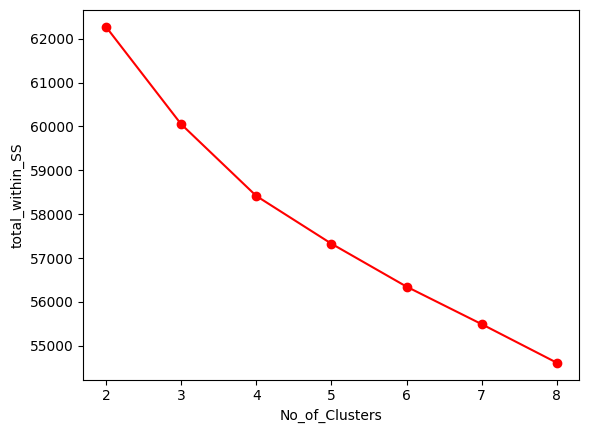

In [33]:
plt.plot(k, TWSS, 'ro-');
plt.xlabel("No_of_Clusters"); 
plt.ylabel("total_within_SS")

### Using KneeLocator

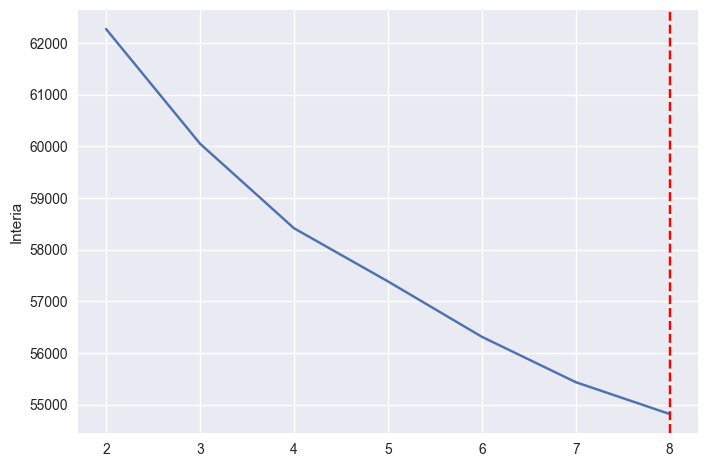

In [34]:
List = []

for k in range(2, 9):
    kmeans = KMeans(n_clusters = k, init = "random", max_iter = 30, random_state = 1, n_init = 10) 
    kmeans.fit(df_norm)
    List.append(kmeans.inertia_)

    
# Refer the link to understand the parameters used: https://kneed.readthedocs.io/en/stable/parameters.html    
from kneed import KneeLocator
kl = KneeLocator(range(2, 9), List, curve = 'convex') 
# The line is pretty linear hence Kneelocator is not able to detect the knee/elbow appropriately
kl.elbow
plt.style.use("seaborn")
plt.plot(range(2, 9), List)
plt.xticks(range(2, 9))
plt.ylabel("Interia")
plt.axvline(x = kl.elbow, color = 'r', label = 'axvline - full height', ls = '--')
plt.show()

### Detecting the best k=4 using TWSS value from scree plot

In [35]:
model = KMeans(n_clusters = 4)
yy = model.fit(df_norm)

In [36]:
model.labels_

array([2, 0, 3, ..., 0, 1, 0])

In [37]:
mb = pd.Series(model.labels_) 

In [40]:
df_new['cluster'] = mb

In [41]:
df_new.head()

,Customer,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,...,Vehicle Size_Small,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,cluster
0,BU79786,0,0,0,1,0,0,0,0,0,...,0,2763.519279,56274,69.0,32,5,0,1.0,384.811147,2
1,QZ44356,0,0,0,0,0,1,0,0,0,...,0,6979.535903,0,94.0,13,42,0,8.0,960.399730,0
2,AI49188,0,1,0,0,0,0,1,0,0,...,0,12887.431650,48767,108.0,18,38,0,2.0,566.472247,3
3,WW63253,1,0,0,0,0,0,0,0,0,...,0,7645.861827,0,106.0,18,65,0,7.0,529.881344,0
4,HB64268,0,0,0,1,0,0,0,0,0,...,0,2813.692575,43836,73.0,12,44,0,1.0,138.130879,1


In [42]:
x = df_new.iloc[:, 1:].values

In [43]:
x

array([[  0.        ,   0.        ,   0.        , ...,   1.        ,
        384.811147  ,   2.        ],
       [  0.        ,   0.        ,   0.        , ...,   8.        ,
        960.39973012,   0.        ],
       [  0.        ,   1.        ,   0.        , ...,   2.        ,
        566.472247  ,   3.        ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   2.        ,
        790.784983  ,   0.        ],
       [  1.        ,   0.        ,   0.        , ...,   3.        ,
        691.2       ,   1.        ],
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
        369.6       ,   0.        ]])

## 3D Scatter plot

In [44]:
# Cluster according to any three Attributes

<IPython.core.display.Javascript object>


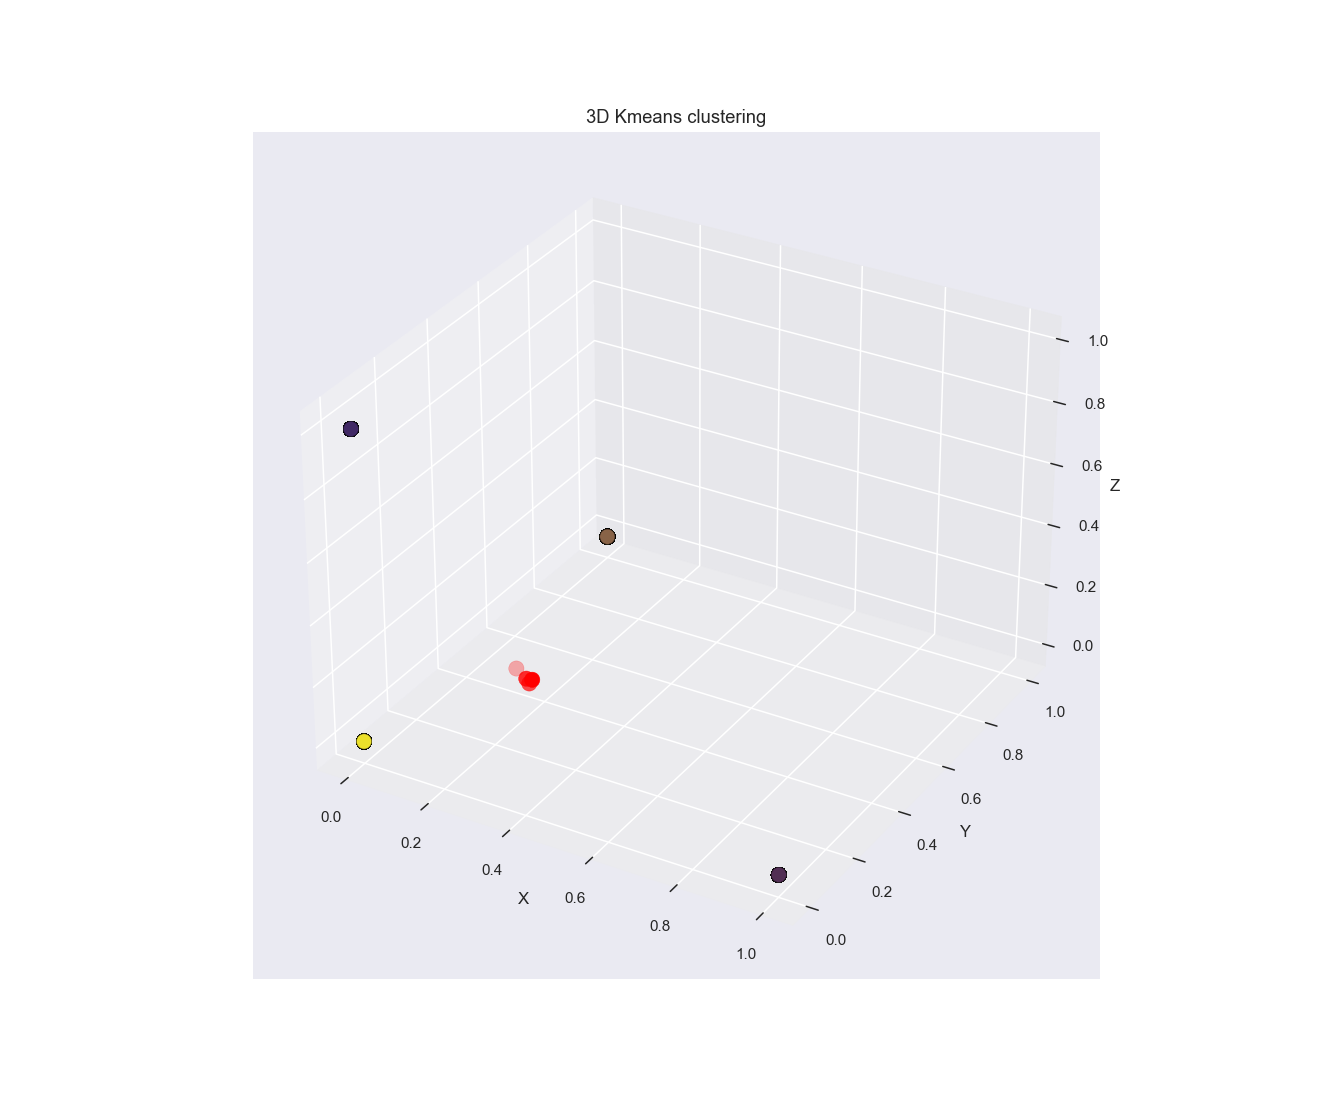

In [45]:
# plot clusters and centroids
%matplotlib notebook
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111, projection = '3d')
#syntax
##ax.scatter(x , y , z , c = , cmap = , marker = , edgecolor = , s = , alpha)
ax.scatter(x[:,0], x[:,1], x[:,2], c=model.labels_, cmap='viridis', marker='o', edgecolor='k', s = 100, alpha = 0.5)
ax.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], model.cluster_centers_[:,2], s = 100, c = 'r', marker='o', label = 'Centroid')
ax.set_title("3D Kmeans clustering")
ax.set_xlabel("X")
ax.set_ylabel("Y")   
ax.set_zlabel("Z")
plt.show()

## Cluster Evaluation

#### Silhouette coefficient:

In [46]:
from sklearn import metrics

In [47]:
metrics.silhouette_score(df_norm, model.labels_)

0.05762931181932128

#### Calinski Harabasz:

In [48]:
metrics.calinski_harabasz_score(df_norm, model.labels_)

445.6037451865269

#### Davies-Bouldin Index:

In [49]:
metrics.davies_bouldin_score(df_norm, model.labels_)

3.6891168077199628

## Evaluation of Number of Clusters using Silhouette Coefficient Technique

In [50]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df_norm)
    score = silhouette_score(df_norm, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [51]:
silhouette_coefficients

[[2, 0.07359852636056576],
 [3, 0.05525039161296788],
 [4, 0.05762931181932128],
 [5, 0.048623762729332526],
 [6, 0.05115992046067421],
 [7, 0.04703554886591831],
 [8, 0.04594992941699864],
 [9, 0.04059009319895478],
 [10, 0.04086231756987419]]

In [52]:
sorted(silhouette_coefficients, reverse = True, key = lambda x: x[1])

[[2, 0.07359852636056576],
 [4, 0.05762931181932128],
 [3, 0.05525039161296788],
 [6, 0.05115992046067421],
 [5, 0.048623762729332526],
 [7, 0.04703554886591831],
 [8, 0.04594992941699864],
 [10, 0.04086231756987419],
 [9, 0.04059009319895478]]

### Silhouette Coeffficients shows, the number of clusters k = 2 as the best value.

In [53]:
from clusteval import clusteval
import numpy as np

# Cluster evaluation.
ce = clusteval(cluster = 'kmeans', evaluate = 'silhouette', max_clust = 10)

In [54]:
df_array = np.array(df_norm)

In [55]:
df_array.shape

(9134, 109)


[clusteval] >Fit using kmeans with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:14<00:00,  1.78s/it]

[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


<IPython.core.display.Javascript object>


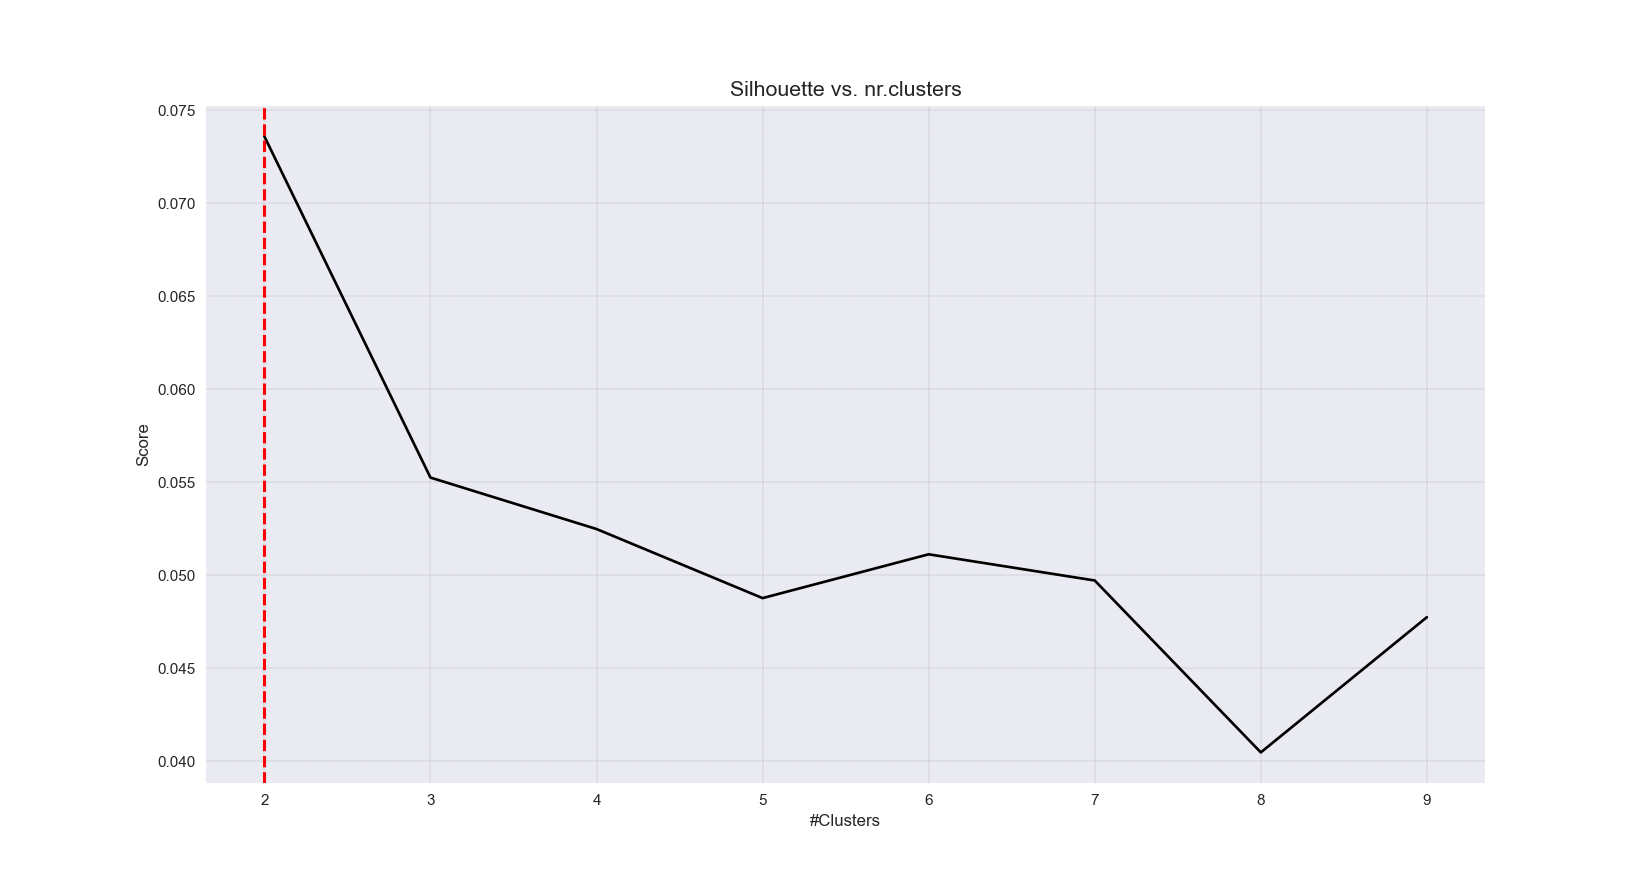

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Silhouette vs. nr.clusters'}, xlabel='#Clusters', ylabel='Score'>)

In [56]:
# Fit
ce.fit(df_array)

# Plot
ce.plot()

[clusteval] >Estimated number of n_clusters: 1, average silhouette_score=0.074


<IPython.core.display.Javascript object>


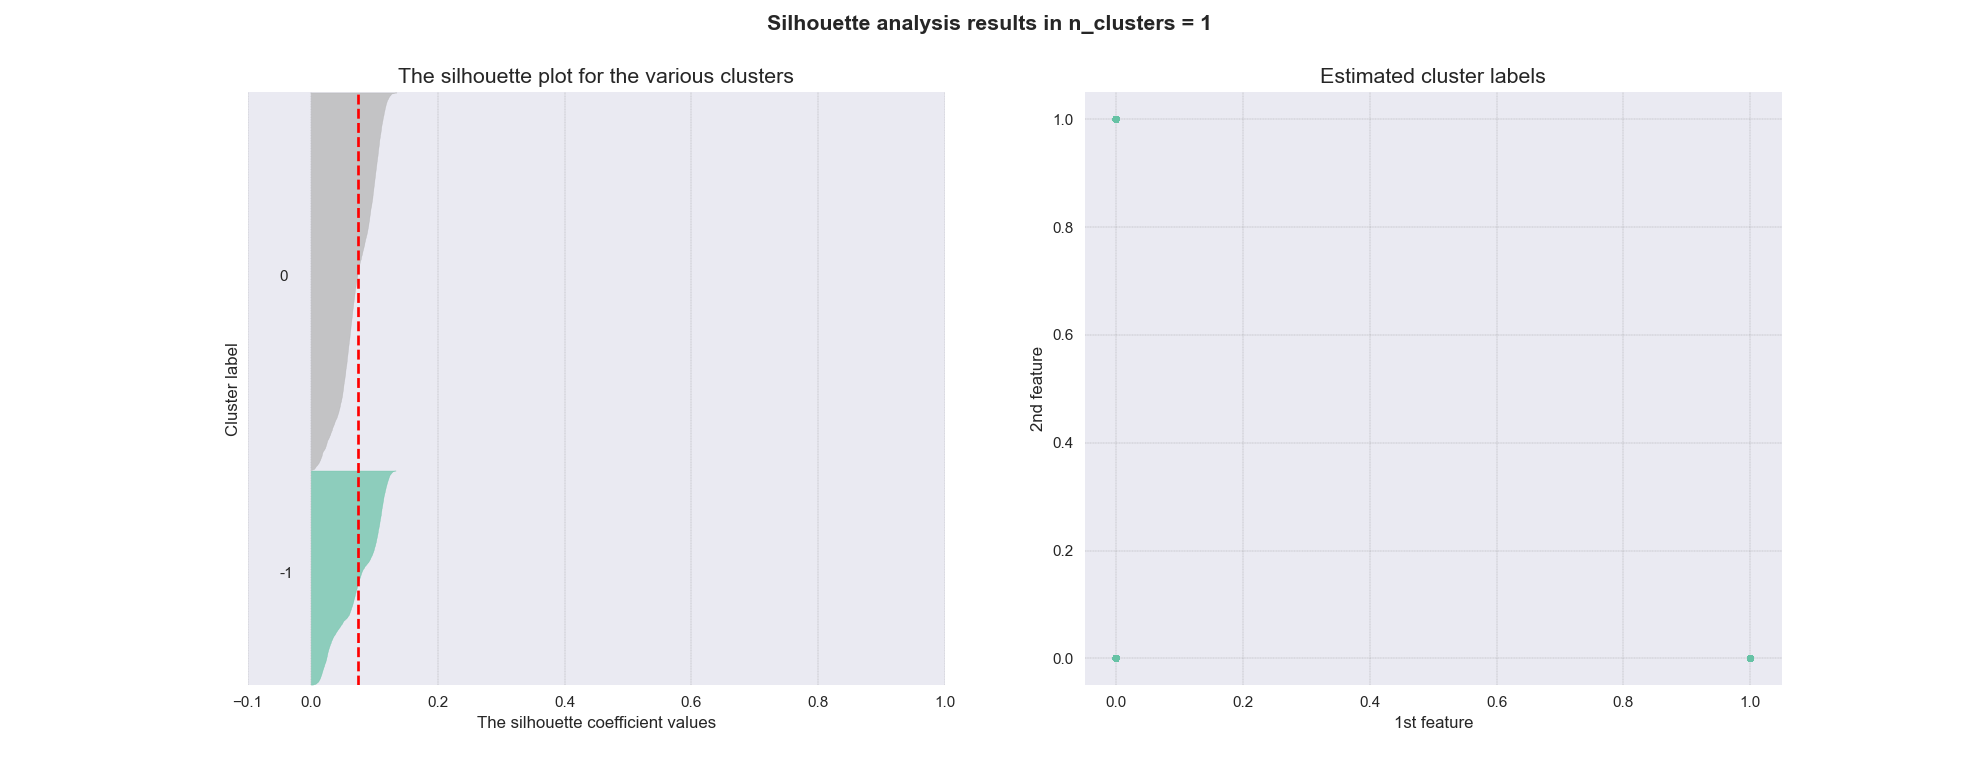

(<Figure size 1800x700 with 2 Axes>,
 <AxesSubplot:title={'center':'The silhouette plot for the various clusters'}, xlabel='The silhouette coefficient values', ylabel='Cluster label'>,
 <AxesSubplot:title={'center':'Estimated cluster labels'}, xlabel='1st feature', ylabel='2nd feature'>)

In [57]:
# Plot
ce.scatter(df_array)